<a href="https://colab.research.google.com/github/nackerson-ventera/demos/blob/master/purchase_loan_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purchase loan summary for Sharath roundtable



## Setup/Imports

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt


## Data Loading

*Protip -- I just discovered there are built in colab code snippets (pandas, reading data from google drive etc. that do most of this for us on the bottom left hand corner (third icon up from the bottom).*

**[Data Dictionary](https://www.freddiemac.com/fmac-resources/research/pdf/user_guide.pdf)**




In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/sandbox/sharath/data/historical_data_2021Q4.txt'
# dataset = pd.read_csv(file_path)

data_chunk = pd.read_csv(file_path,
                         delimiter='|',
                         names=column_names,
                         dtype=dtypes,
                         nrows=10)

data_chunk



,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,MSA,MI Percentage,Number of Units,Occupancy Status,Original CLTV,Original DTI Ratio,...,Number of Borrowers,Seller Name,Servicer Name,Super Conforming Flag,Pre-HARP Loan Sequence Number,Program Indicator,HARP Indicator,Property Valuation Method,Interest Only Indicator,MI Cancellation Indicator
0,801,202112,N,203611,<NA>,0,1,P,50.0,43.0,...,2,Other sellers,NATIONSTAR MORTGAGE LLC DBA MR. COOPER,NaN,NaN,9,NaN,2,N,7
1,804,202201,Y,205112,<NA>,0,1,P,60.0,42.0,...,1,Other sellers,NATIONSTAR MORTGAGE LLC DBA MR. COOPER,NaN,NaN,9,NaN,2,N,7
2,768,202112,N,203611,47664,0,1,P,66.0,37.0,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
3,751,202112,N,203611,41180,0,1,P,50.0,23.0,...,2,Other sellers,U.S. BANK N.A.,NaN,NaN,9,NaN,2,N,7
4,803,202201,N,203612,33340,0,1,I,55.0,28.0,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
5,729,202112,N,205111,15764,25,1,P,90.0,43.0,...,1,Other sellers,Other servicers,NaN,NaN,H,NaN,1,N,N
6,666,202112,N,204111,<NA>,0,1,P,48.0,29.0,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
7,685,202112,N,205111,23060,0,1,P,80.0,36.0,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
8,713,202112,N,205111,21780,0,1,P,65.0,21.0,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
9,751,202111,N,205110,45780,0,1,P,80.0,36.0,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7


## Data Pre-proc

**Noble/Manthan**

In [ ]:
column_names = [
    "Credit Score", "First Payment Date", "First Time Homebuyer Flag", "Maturity Date",
    "MSA", "MI Percentage", "Number of Units", "Occupancy Status", "Original CLTV",
    "Original DTI Ratio", "Original UPB", "Original LTV", "Original Interest Rate",
    "Channel", "PPM Flag", "Amortization Type", "Property State", "Property Type",
    "Postal Code", "Loan Sequence Number", "Loan Purpose", "Original Loan Term",
    "Number of Borrowers", "Seller Name", "Servicer Name", "Super Conforming Flag",
    "Pre-HARP Loan Sequence Number", "Program Indicator", "HARP Indicator",
    "Property Valuation Method", "Interest Only Indicator", "MI Cancellation Indicator"
]

# Define the data types for each column to optimize memory usage
dtypes = {
    'Credit Score': 'Int64',
    'First Payment Date': 'str',
    'First Time Homebuyer Flag': 'category',
    'Maturity Date': 'str',
    'MSA': 'Int64',
    'MI Percentage': 'Int64',
    'Number of Units': 'Int64',
    'Occupancy Status': 'category',
    'Original CLTV': 'float',
    'Original DTI Ratio': 'float',
    'Original UPB': 'Int64',
    'Original LTV': 'float',
    'Original Interest Rate': 'float',
    'Channel': 'category',
    'PPM Flag': 'category',
    'Amortization Type': 'category',
    'Property State': 'category',
    'Property Type': 'category',
    'Postal Code': 'Int64',
    'Loan Sequence Number': 'str',
    'Loan Purpose': 'category',
    'Original Loan Term': 'Int64',
    'Number of Borrowers': 'Int64',
    'Seller Name': 'str',
    'Servicer Name': 'str',
    'Super Conforming Flag': 'category',
    'Pre-HARP Loan Sequence Number': 'str',
    'Program Indicator': 'category',
    'HARP Indicator': 'category',
    'Property Valuation Method': 'Int64',
    'Interest Only Indicator': 'category',
    'MI Cancellation Indicator': 'category'
}

## Experimentation / Summaries



In [ ]:
# Percentage of purchased loans

## Sharath reference
'''
TODO for LTV, FI
LTV >= 95 percentage=round(sum(OLTV >= 95 & purpose == 'P')/sum(OLTV != 999 & purpose == 'P')*100,1)
FICO < 680
DTI > 45
'''

count_LTV_ge_95 = 0
count_FICO_lt_680 = 0
count_DTI_gt_45 = 0

for chunk in pd.read_csv(file_path,
                         delimiter='|',
                         names=column_names,
                         dtype=dtypes,
                         chunksize=chunksize):

    # Filter for purchase loans
    purchase_loans = chunk[chunk['Loan Purpose'] == 'P']

    # Count the number of loans that meet each condition
    count_LTV_ge_95 += len(purchase_loans[purchase_loans['Original LTV'] >= 95])
    count_FICO_lt_680 += len(purchase_loans[purchase_loans['Credit Score'] < 680])
    count_DTI_gt_45 += len(purchase_loans[purchase_loans['Original DTI Ratio'] > 45])

# Calculate the percentages
percentage_LTV_ge_95 = count_LTV_ge_95 / count_purchase_loans * 100
percentage_FICO_lt_680 = count_FICO_lt_680 / count_purchase_loans * 100
percentage_DTI_gt_45 = count_DTI_gt_45 / count_purchase_loans * 100

percentage_LTV_ge_95, percentage_FICO_lt_680, percentage_DTI_gt_45









(27.286932586498068, 5.933614197883299, 12.904544115967811)

## Percentage of purchased loans

*   LTV >= 95: ~ 27.29%
*   FICO < 680: approximately 5.93%
*   DTI > 45: approximately 12.90%





## Data Viz



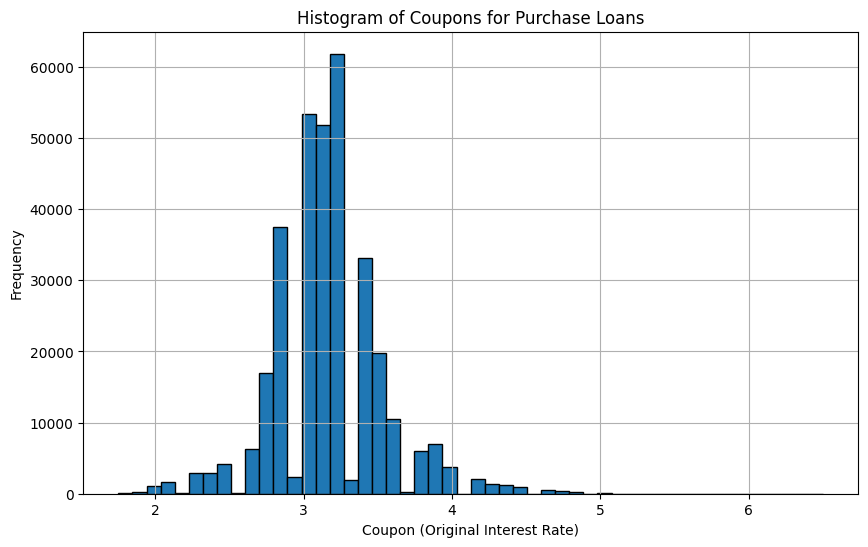

In [ ]:
interest_rates = []

chunksize = 10 ** 6

for chunk in pd.read_csv(file_path,
                         delimiter='|',
                         names=column_names,
                         dtype=dtypes,
                         chunksize=chunksize):

    purchase_loans = chunk[chunk['Loan Purpose'] == 'P']

    interest_rates.extend(purchase_loans['Original Interest Rate'].values)

interest_rates = pd.Series(interest_rates)

# ok let's plot historgram
plt.figure(figsize=(10,6))
plt.hist(interest_rates, bins=50, edgecolor='black')
plt.title('Histogram of Coupons for Purchase Loans')
plt.xlabel('Coupon (Original Interest Rate)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Data Summaries

In [ ]:
# Volume of purchase loans

count_purchase_loans = 0
dollar_volume_purchase_loans = 0

for chunk in pd.read_csv(file_path,
                         delimiter='|',
                         names=column_names,
                         dtype=dtypes,
                         chunksize=chunksize):

    purchase_loans = chunk[chunk['Loan Purpose'] == 'P']

    count_purchase_loans += len(purchase_loans)

    dollar_volume_purchase_loans += purchase_loans['Original UPB'].sum()

count_purchase_loans, dollar_volume_purchase_loans



(332782, 106554281000)

## Volume of purchase loans

Count: 332,782 purchase loans

Dollar Volume: $106,554,281,000